In [1]:
from utils import base_model, feature_importance, preprocessing
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import os

In [2]:
df = pd.read_csv('data/Bank Customer Churn Prediction.csv')

In [3]:
df = preprocessing(df)

In [4]:
features = ['credit_score', 'gender', 'age', 'tenure', 'balance',
    'products_number', 'credit_card', 'active_member', 'estimated_salary',
    'country_France', 'country_Germany', 'country_Spain', 'balance_0']
target = 'churn'

In [5]:
random.seed(42)
os.environ["PYTHONHASHSEED"] = str(42)
np.random.seed(42)

In [6]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = base_model(X_train, y_train)

최적 하이퍼 파라미터:  {'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 263}
최고 예측 정확도: 0.9461
Accuracy: 0.8337
AUC: 0.7750
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       647
           1       0.55      0.68      0.61       153

    accuracy                           0.83       800
   macro avg       0.74      0.77      0.75       800
weighted avg       0.85      0.83      0.84       800



In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC: {auc:.4f}')
print('Classification Report:')
print(report)

Accuracy: 0.8395
AUC: 0.7733
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1607
           1       0.58      0.66      0.62       393

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.85      0.84      0.84      2000



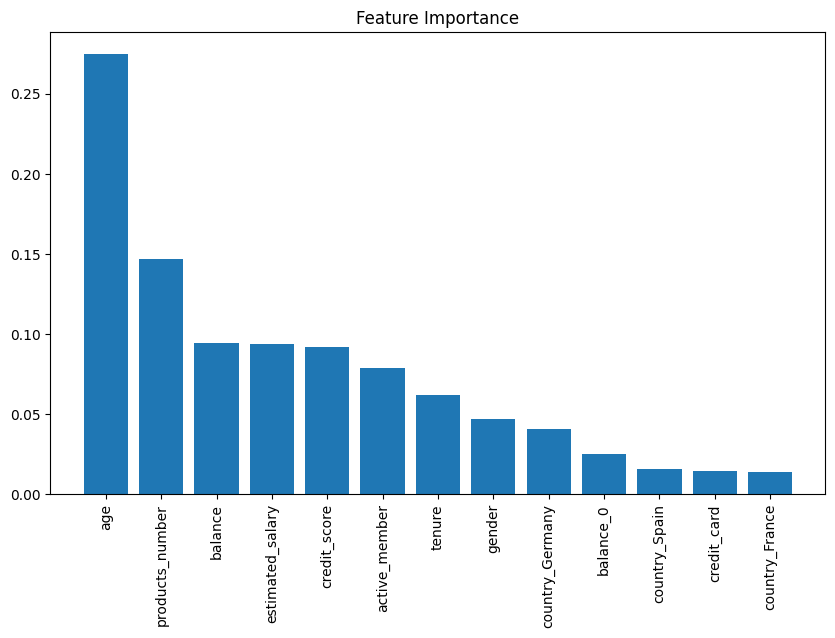

In [9]:
feature_importance(model, X_train)

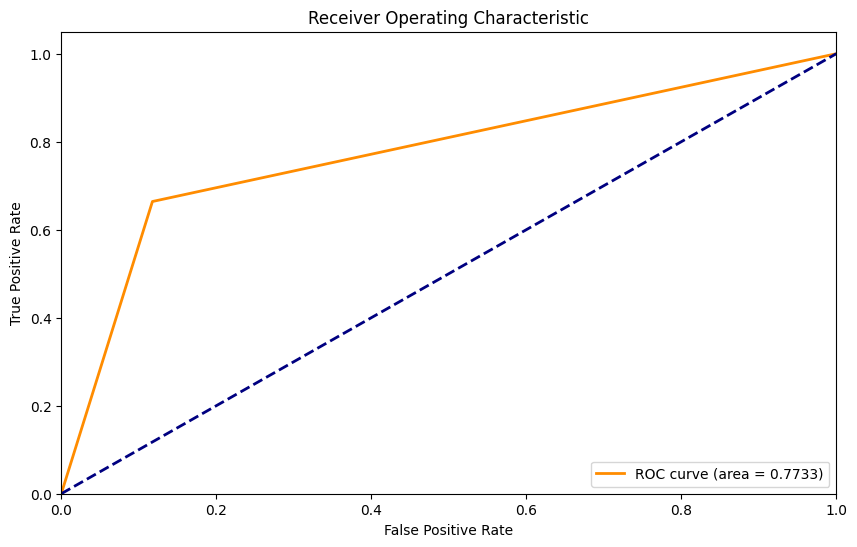

In [11]:
from utils import roc_auc_curve_plt

roc_auc_curve_plt(y_test, y_pred)